#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

#### Looking at the whole data

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#### Reading file

In [3]:
df = pd.read_csv("Leads.csv")

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

# 1. Cleaning Data

#### Checking for duplicates

In [6]:
df.duplicated().sum()

0

#### Inspecting the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Finding null % in each column

In [9]:
round(df.isnull().mean()*100,2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Replacing "select" to "null/NaN" in certain columns as it is equivalent to null or meaning that the user did not select any option from the dropdown and left it blank

In [10]:
df = df.replace("Select",np.NaN)

In [11]:
round(df.isnull().mean()*100,2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Since there are no duplicates, we can drop "Prospect ID" and "Lead Number" 
#### And columns which have missing values more than 45%

In [12]:
df = df.drop(["Prospect ID","Lead Number","How did you hear about X Education","Lead Profile",
              "Lead Quality","Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index",
              "Asymmetrique Activity Index"],axis=1)

In [13]:
df.shape

(9240, 28)

#### From initial 37 columns now we have 28 columns

##| Finding and Fixing missing values

In [14]:
df.isnull().sum().sort_values(ascending=False)

City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Lead Origin                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Magazine                    

#### We have 10 columns where either we have to drop or replace null values

In [15]:
df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### As null value is 3669 which is the highest count of category, we can not drop null values, but replace it

In [16]:
df["City"].fillna("Other Cities", inplace=True)

In [17]:
df["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### As null value is 3380 which is the highest count of category, we can not drop null values, but replace it
Here it is categorical column, so we add a category

In [18]:
df["Specialization"].fillna("Others", inplace=True)

In [19]:
df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### As null value is 3353 which is the highest count of category, we can not drop null values, but replace it
Here it is categorical column, so we add a category

In [20]:
df["Tags"].fillna("Others", inplace=True)

In [21]:
df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### As null value is 2709 which is the high count of category, we can not drop null values, but replace it
Here it is categorical column, so we add a category

In [22]:
df["What matters most to you in choosing a course"].fillna("Other", inplace=True)

In [23]:
df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### As null value is 2690 which is the high count of category, we can not drop null values, but replace it
Here it is categorical column, so we add a category

In [24]:
df["What is your current occupation"].fillna("Other", inplace=True)

In [25]:
df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Sweden                     3
Bangladesh                 2
Philippines                2
Asia/Pacific Region        2
Belgium                    2
China                      2
Netherlands                2
Ghana                      2
Uganda                     2
Italy                      2
Denmark                    1
Sri Lanka                  1
Russia                     1
Switzerland                1
Indonesia                  1
Malaysia                   1
Tanzania      

#### As null value is 2461 which is the high count of category, we can not drop null values, but replace it
Here it is categorical column, so we add a category

In [26]:
df["Country"].fillna("Other", inplace=True)

In [27]:
def bucket(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Other":
        category = "Other"
    else:
        category = "Outside India"
    return category

df["Country"] = df.apply(lambda x:bucket(x["Country"]),axis=1)

In [28]:
df["Country"].value_counts()

India            6492
Other            2461
Outside India     287
Name: Country, dtype: int64

In [29]:
df["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [30]:
df["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [31]:
df["TotalVisits"] = df["TotalVisits"].fillna(df["TotalVisits"].median())

In [32]:
df["Page Views Per Visit"].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.80        9
4.33        9
2.20        9
14.00       9
3.25        8
2.17        8
1.60        8
2.40        6
13.00       6
12.00       5
1.20        5
2.60        4
1.83        4
15.00       4
1.71        4
3.40        4
1.43        4
1.57        3
5.67        3
16.00       3
4.75        3
1.38        3
1.78        3
4.25        3
1.23        2
2.09        2
2.22        2
1.22        2
3.60        2
5.33        2
2.83        2
1.14        2
3.75        2
7.50        2
5.40        2
1.56        2
2.71        2
3.20        2
5.25        2
2.14        1
55.00       1
1.19  

In [33]:
df["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [34]:
df["Page Views Per Visit"] = df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median())

In [35]:
df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Keeping 103 null values in other category is of no help, thus, dropping null values

In [36]:
df.dropna(axis=0,subset=["Last Activity"],inplace=True)

In [37]:
df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             462
Welingak Website      129
Referral Sites        125
Facebook               39
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
blog                    1
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

#### Keeping 34 null values in other category is of no help, thus, dropping null values

In [38]:
df.dropna(axis=0,subset=["Lead Source"],inplace=True)

#### Checking null values

In [39]:
df.isnull().sum().sort_values(ascending=False)

Lead Origin                                      0
Lead Source                                      0
A free copy of Mastering The Interview           0
I agree to pay the amount through cheque         0
City                                             0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Tags                                             0
Receive More Updates About Our Courses           0
Through Recommendations                          0
Digital Advertisement                            0
Newspaper                                        0
X Education Forums                               0
Newspaper Article                                0
Magazine                                         0
Search                                           0
What matters most to you in choosing a course    0
What is your current occupation                  0
Specialization                                   0
Country                        

### Checking for outliers in numerical data

In [40]:
df.select_dtypes("int64").columns

Index(['Converted', 'Total Time Spent on Website'], dtype='object')

In [41]:
df.select_dtypes("float64").columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

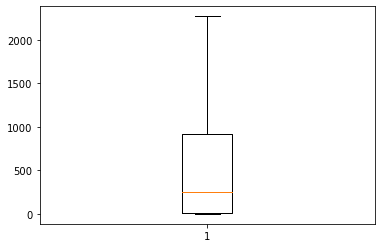

In [42]:
plt.boxplot(df["Total Time Spent on Website"])
plt.show()

#### Converting total time spent on website from seconds to minutes

In [43]:
df["Total Time Spent on Website"] = round(df["Total Time Spent on Website"]/(60),2)

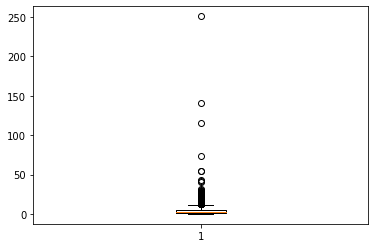

In [44]:
plt.boxplot(df["TotalVisits"])
plt.show()

In [45]:
df["TotalVisits"].quantile([0.5,0.75,0.8,0.9,0.99])

0.50     3.0
0.75     5.0
0.80     5.0
0.90     7.0
0.99    17.0
Name: TotalVisits, dtype: float64

#### Visiting more than 15 times seems too much
- Drop outliers

In [46]:
df.drop(df[df["TotalVisits"]>15.0].index,inplace=True)

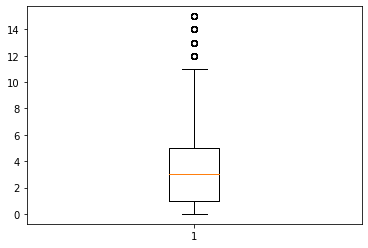

In [47]:
plt.boxplot(df["TotalVisits"])
plt.show()

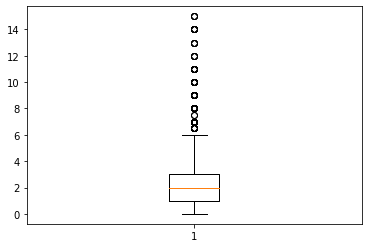

In [48]:
plt.boxplot(df["Page Views Per Visit"])
plt.show()

In [49]:
df["Page Views Per Visit"].quantile([0.5,0.75,0.8,0.9,0.99])

0.50    2.0
0.75    3.0
0.80    4.0
0.90    5.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

#### Visiting a page more than 6 times seems too much
- Drop outliers

In [50]:
df.drop(df[df["Page Views Per Visit"]>6.0].index,inplace=True)

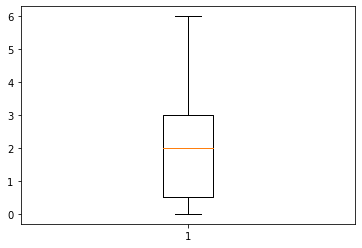

In [51]:
plt.boxplot(df["Page Views Per Visit"])
plt.show()

# 2. EDA

#### Univariate Analysis

In [52]:
cat_col = df.select_dtypes("object").columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

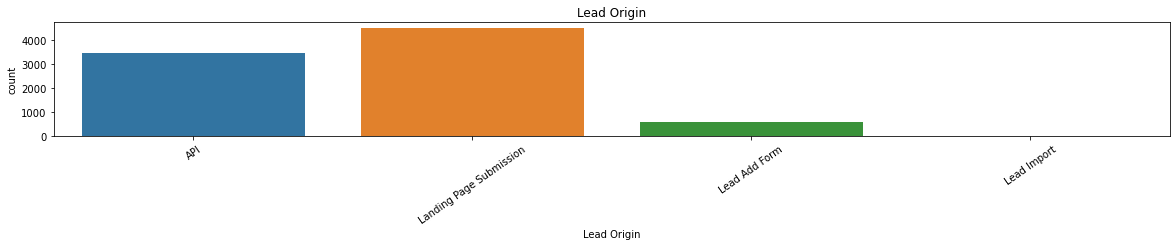

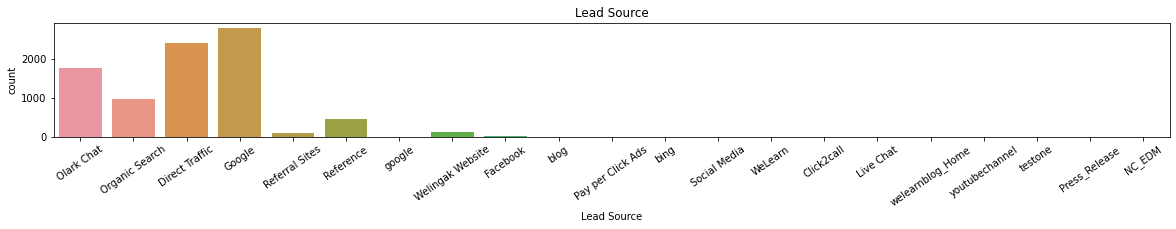

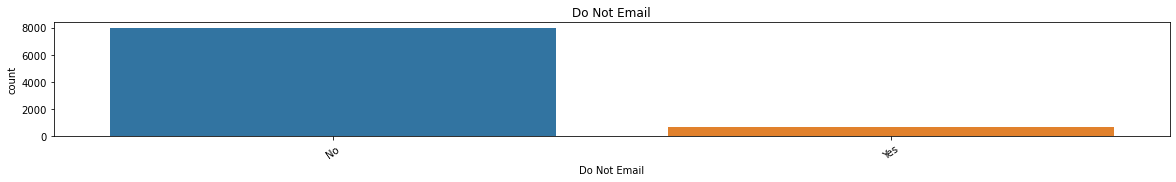

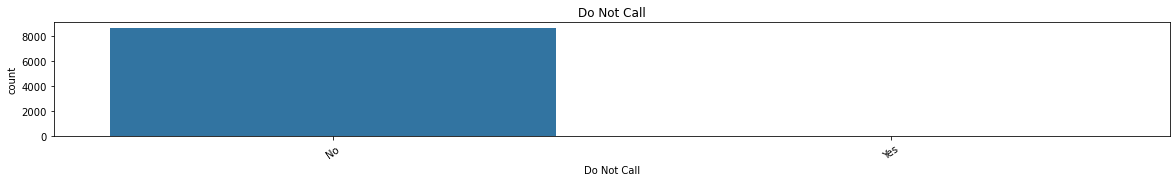

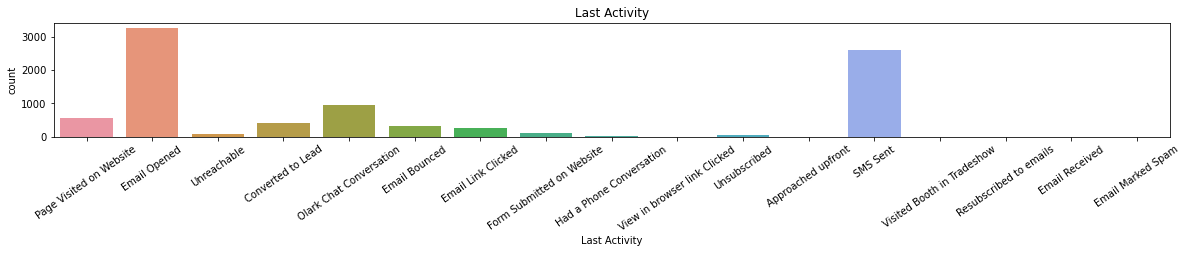

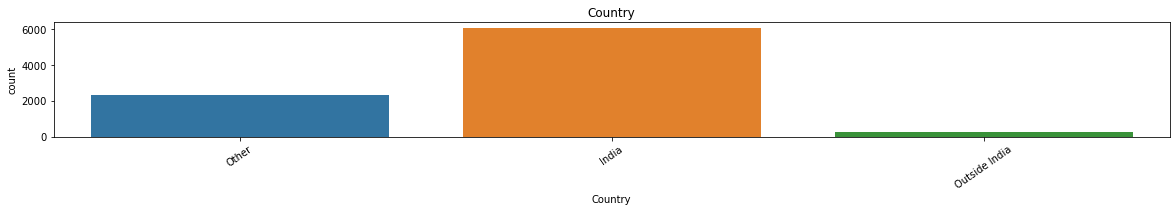

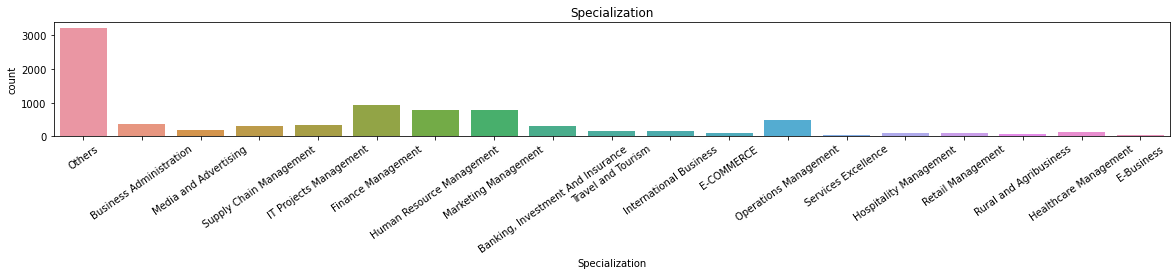

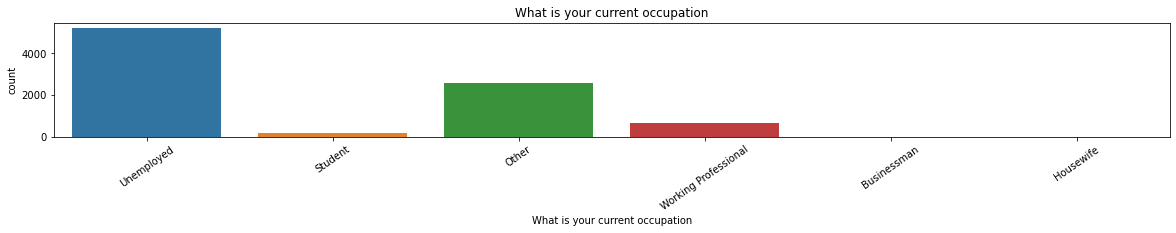

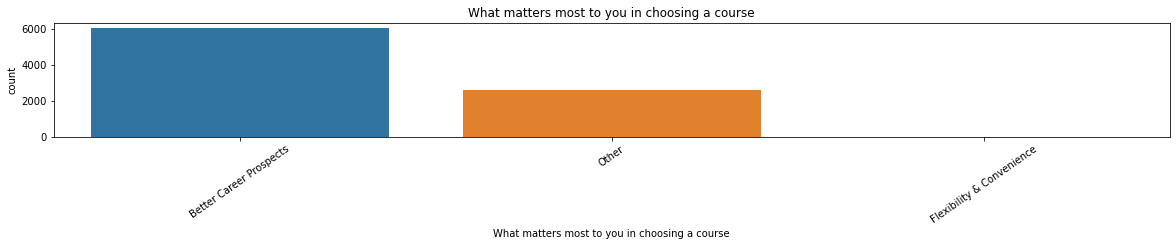

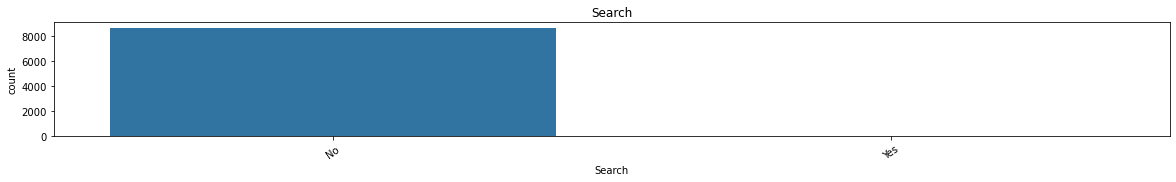

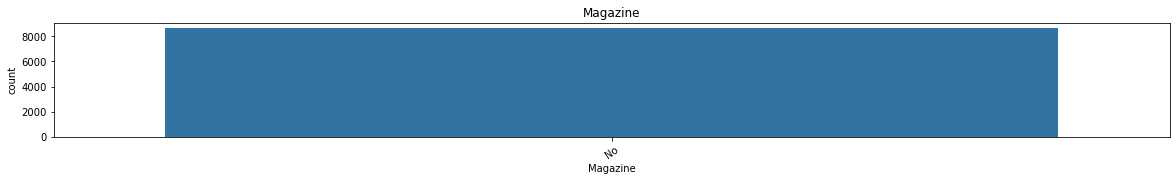

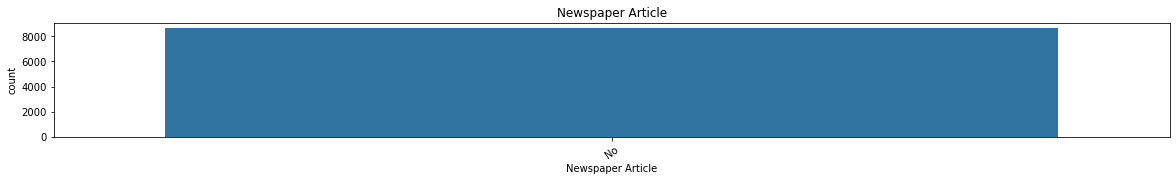

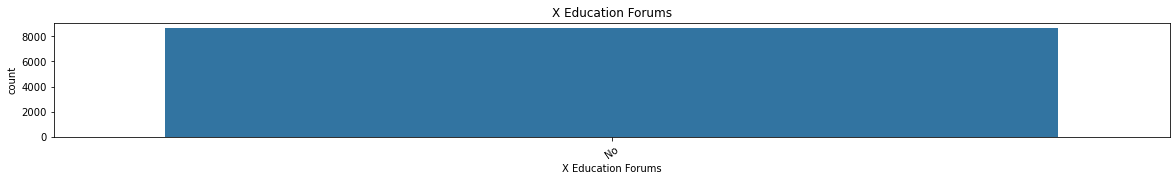

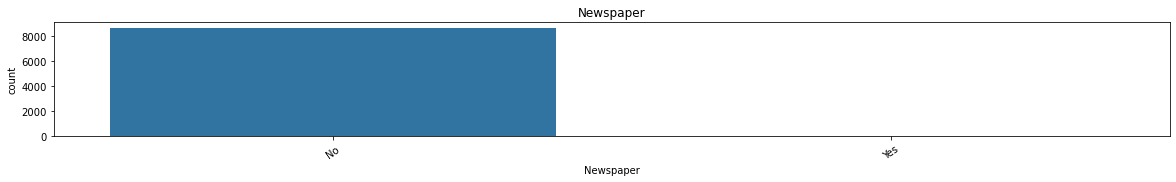

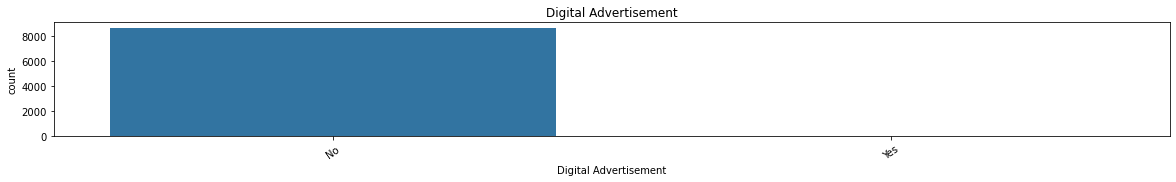

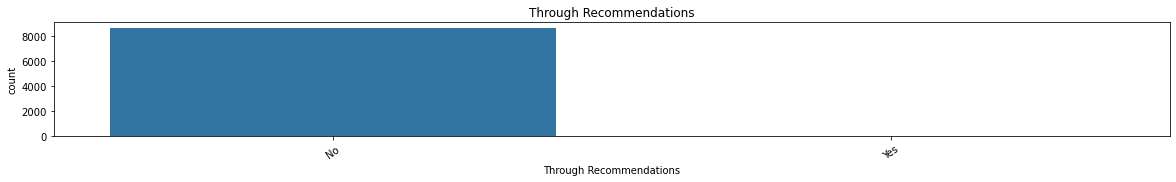

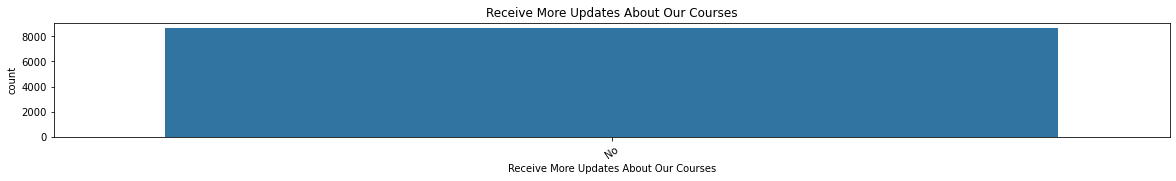

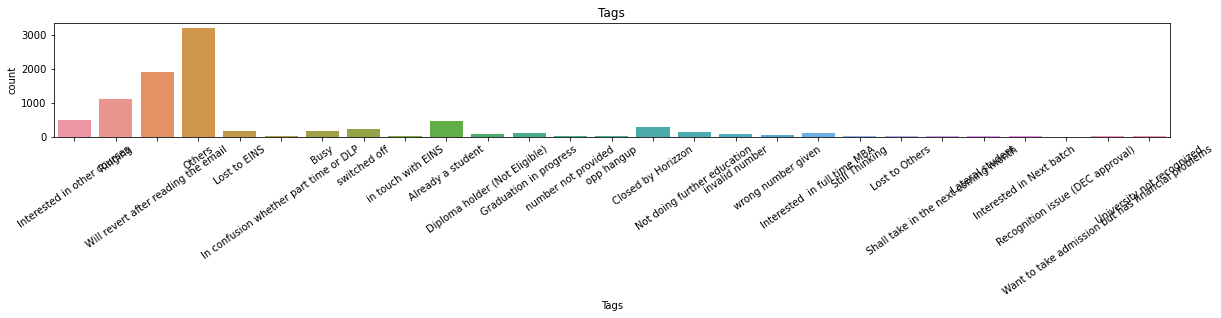

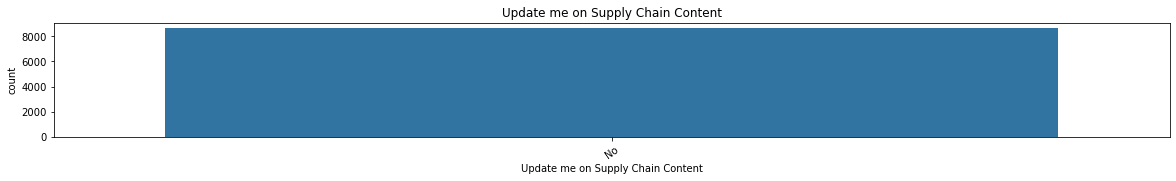

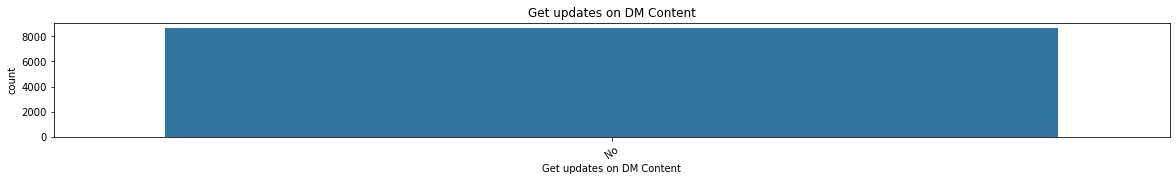

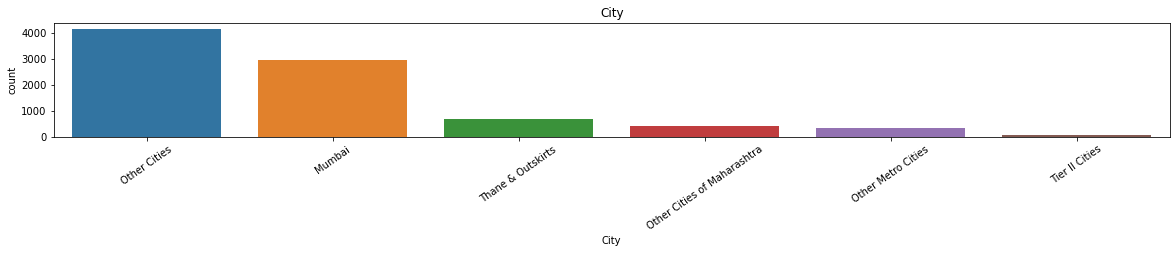

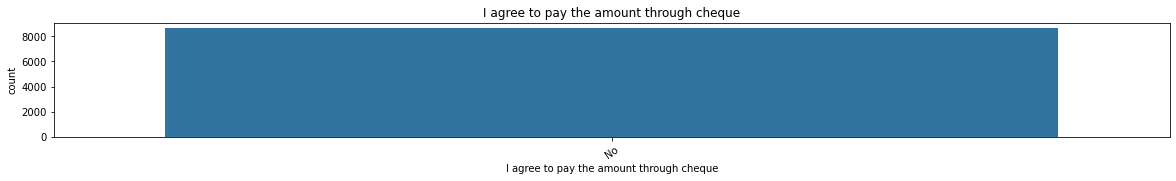

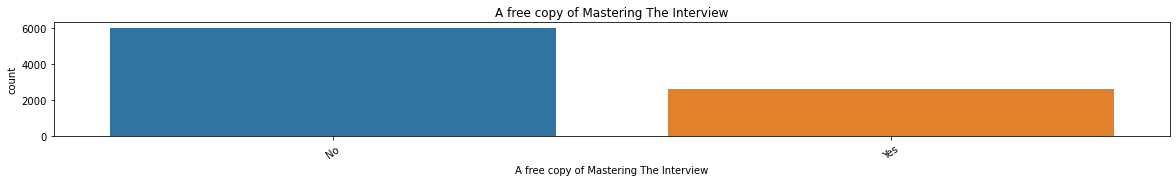

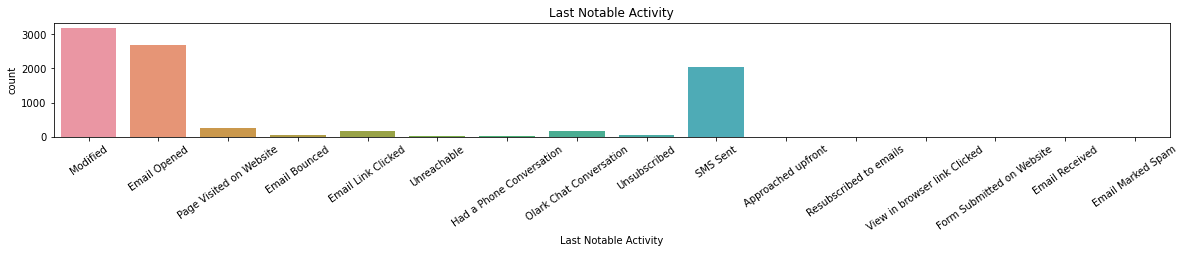

In [53]:
for i in range(0,len(cat_col)):
    plt.figure(figsize=(20,60))
    plt.subplot(24,1,i+1)
    chart = sns.countplot(df[cat_col[i]])
    chart.set_xticklabels(chart.get_xticklabels(),rotation=35)
    plt.title(cat_col[i])

#### Checking the columns Yes/No categorical values

In [54]:
yes_no = ["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper",
          "Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
          "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
          "A free copy of Mastering The Interview"]

In [55]:
for i in yes_no:
    per = (df[i].value_counts()/df[i].shape[0])*100
    print(per)
    print("--------------------------------------")

No     92.329052
Yes     7.670948
Name: Do Not Email, dtype: float64
--------------------------------------
No     99.97686
Yes     0.02314
Name: Do Not Call, dtype: float64
--------------------------------------
No     99.884299
Yes     0.115701
Name: Search, dtype: float64
--------------------------------------
No    100.0
Name: Magazine, dtype: float64
--------------------------------------
No    100.0
Name: Newspaper Article, dtype: float64
--------------------------------------
No    100.0
Name: X Education Forums, dtype: float64
--------------------------------------
No     99.98843
Yes     0.01157
Name: Newspaper, dtype: float64
--------------------------------------
No     99.97686
Yes     0.02314
Name: Digital Advertisement, dtype: float64
--------------------------------------
No     99.95372
Yes     0.04628
Name: Through Recommendations, dtype: float64
--------------------------------------
No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
------------

#### Droping columns with more than 99% values as "No"

In [56]:
df = df.drop(["Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper",
          "Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
          "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

In [57]:
df.shape

(8643, 16)

In [58]:
num_col = df.select_dtypes("float64").columns
num_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

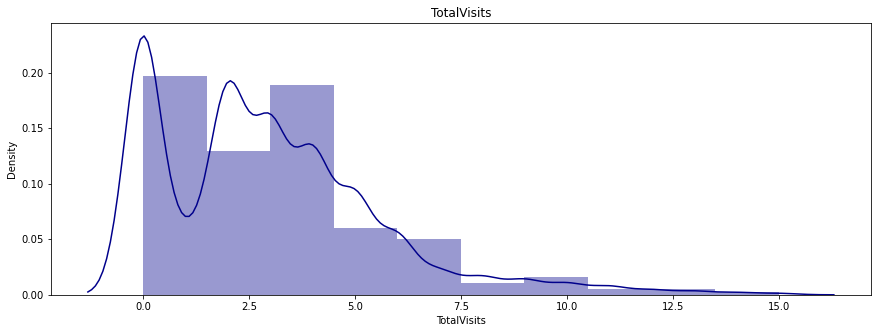

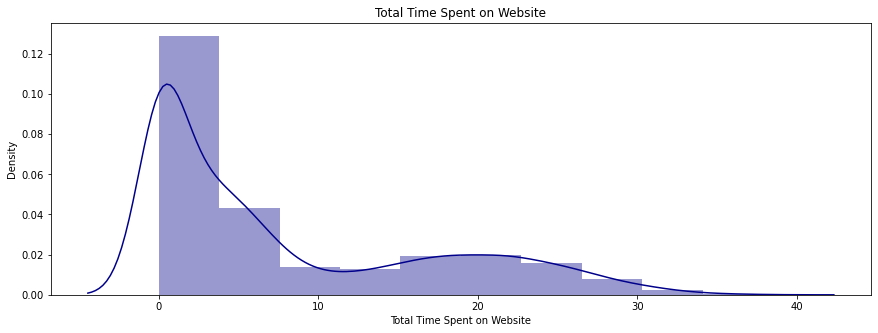

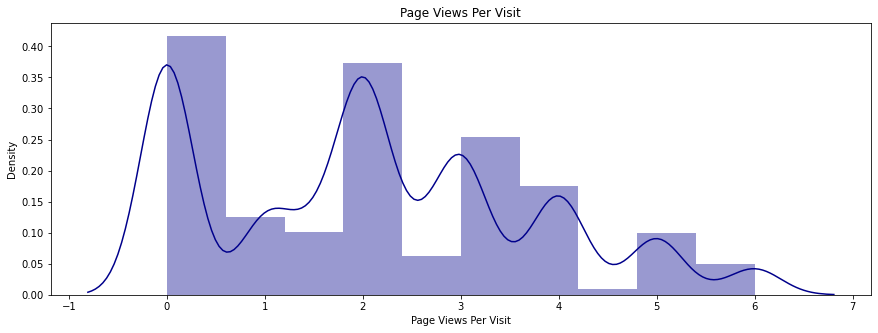

In [59]:
for i in range(0,len(num_col)):
    plt.figure(figsize=(50,5))
    plt.subplot(1,3,i+1)
    sns.distplot(df[num_col[i]],bins=10,color="darkblue")
    plt.title(num_col[i])

#### Bivariate analysis
- Relating categorical values to converted
- Checking correlation between different columns

In [60]:
new_cat_col = df.select_dtypes("object").columns
new_cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

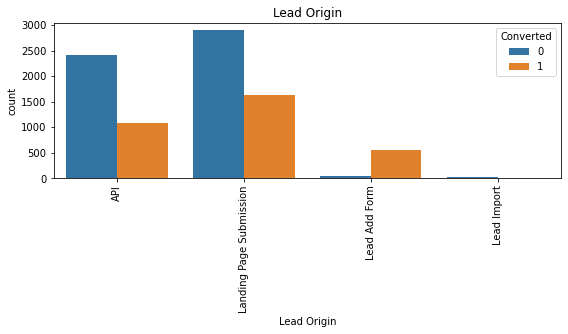

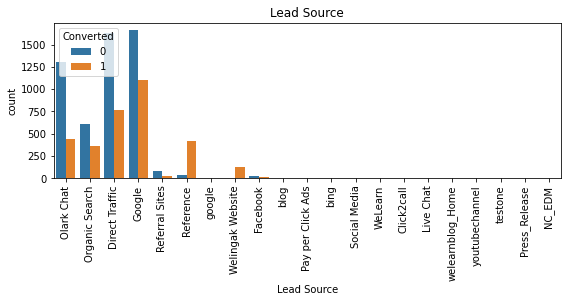

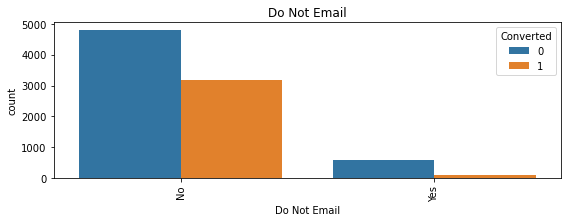

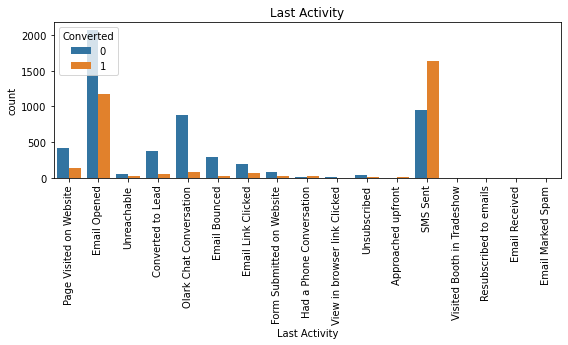

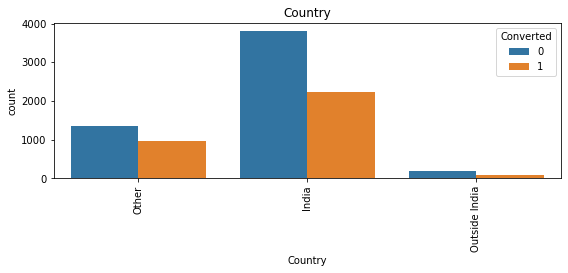

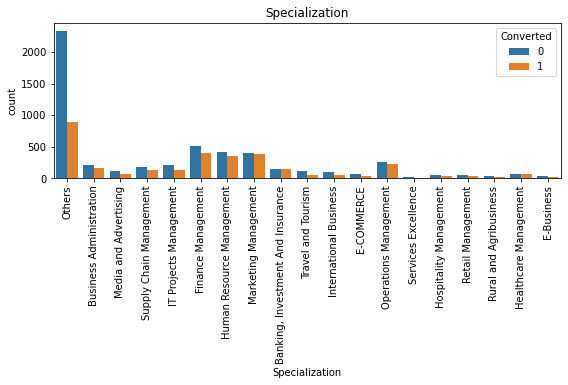

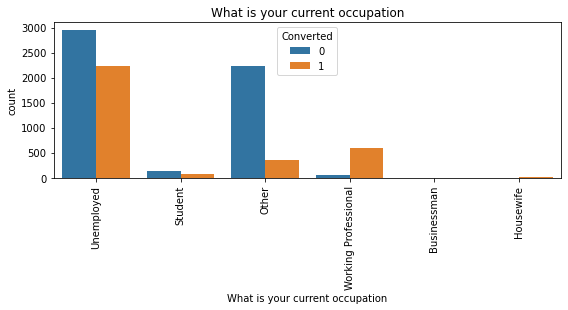

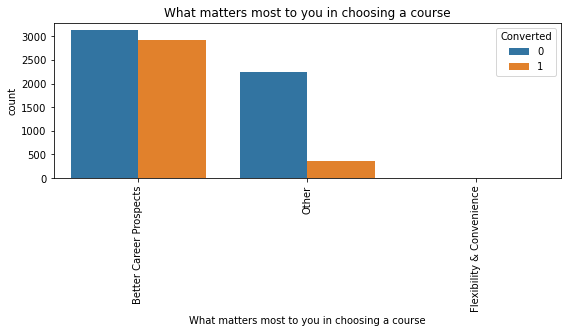

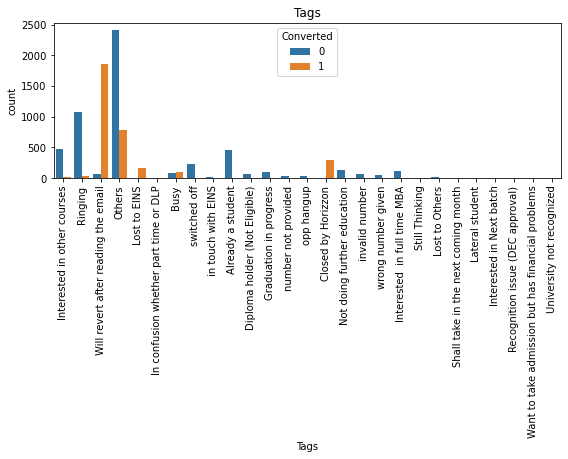

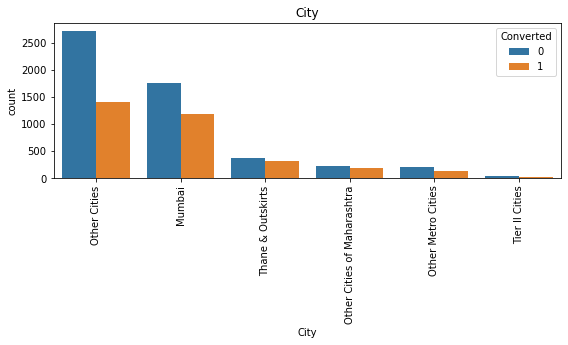

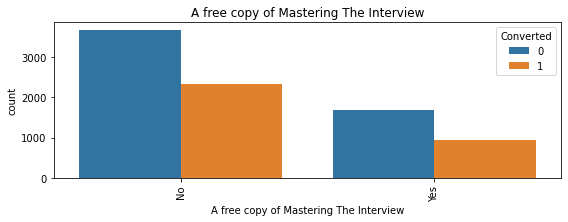

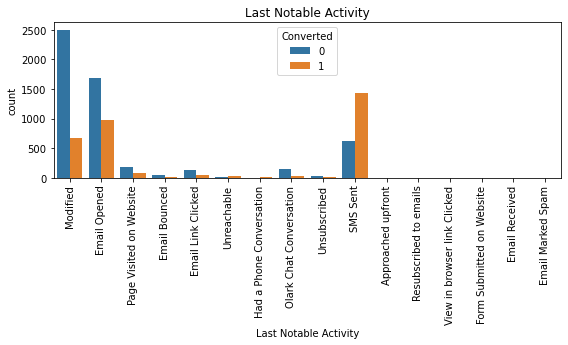

In [61]:
for i in range(0,len(new_cat_col)):
    plt.figure(figsize=(20,20))
    plt.subplot(6,2,i+1)
    sns.countplot(x=df[new_cat_col[i]], hue="Converted", data = df).tick_params(axis="x", rotation = 90)
    plt.title(new_cat_col[i])

#### Bivariate Analysis Observations : 
- Lead Origin: Lead Add Form has the highest conversion rate
- Lead Source: Most successful is Google, followed by Direct Traffic. But the highest conversion rate is if from Reference
- Last Activity:SMS sent has the highest convergenge rate followed by Email Opened
- Country: Most dominance in India
- Specialization: Finance Management,HR Management, and Marketing Management have the highest conversion rate in known category
- Current Occupation: Unemployed have the highest conversion rate
- Tags: Will revert after reading the email has the highest conversion rate
- Those who asked for a free copy of Mastering the Interview have a good conversion rate

In [62]:
new_num_col= df.select_dtypes("float64").columns
new_num_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

<Figure size 1440x360 with 0 Axes>

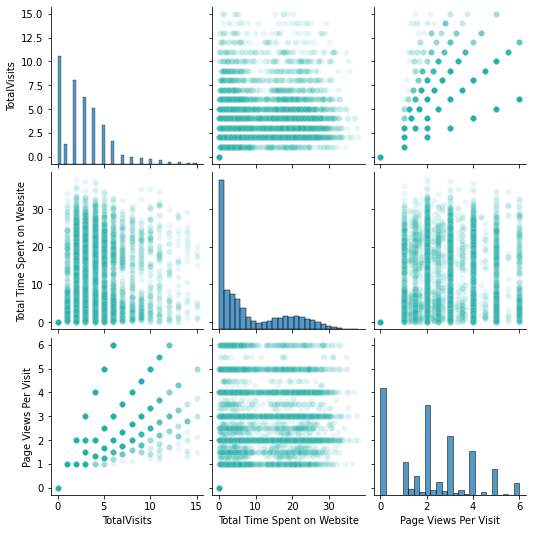

In [63]:
plt.figure(figsize=(20,5))
sns.pairplot(df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']],
             plot_kws={"alpha":0.1,"color":"lightseagreen"})
plt.show()

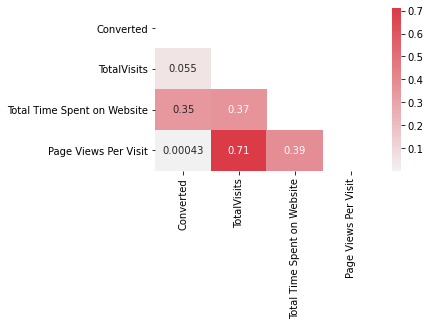

In [64]:
corr= df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(5, 3))
heatmap = sns.heatmap(corr,mask=mask,cmap=cmap,center=0,annot=True)

#### Correlation Analysis (Heatmap) Observation:
- There is positive correlation between Total Time Spent on Website and Conversion
- There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion

# 3. Creating Dummy Variables

In [65]:
df= pd.get_dummies(data=df,columns=new_cat_col,drop_first=True)

In [66]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Other,Country_Outside India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,11.23,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [67]:
df.shape

(8643, 118)

In [68]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Other,Country_Outside India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.00000

# 4. Train-Test Split

In [69]:
y = df.pop("Converted")
X = df

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [71]:
# Checking the values before scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Other,Country_Outside India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5726,0.0,0.00,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7037,3.0,8.65,3.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [72]:
scaler = MinMaxScaler()

In [73]:
# Apply scaler() to all the numeric variables

X_train[new_num_col] = scaler.fit_transform(X_train[new_num_col])

In [74]:
# Checking values after scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Other,Country_Outside India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5726,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7037,0.200000,0.230360,0.500000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# 5. Model Building

In [75]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rfe = RFE(logreg, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [76]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', False, 24),
 ('Lead Origin_Lead Import', False, 38),
 ('Lead Source_Direct Traffic', False, 64),
 ('Lead Source_Facebook', False, 9),
 ('Lead Source_Google', False, 71),
 ('Lead Source_Live Chat', False, 93),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', False, 72),
 ('Lead Source_Organic Search', False, 73),
 ('Lead Source_Pay per Click Ads', False, 95),
 ('Lead Source_Press_Release', False, 96),
 ('Lead Source_Reference', False, 55),
 ('Lead Source_Referral Sites', False, 69),
 ('Lead Source_Social Media', False, 63),
 ('Lead Source_WeLearn', False, 88),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 91),
 ('Lead Source_blog', False, 62),
 ('Lead Source_google', False, 70),
 ('Lead Source_testone', False, 99),
 ('Lead Source_welearnblog_Home', False, 

In [77]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'What matters most to you in choosing a course_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [78]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=102)

In [79]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,Total Time Spent on Website,Lead Source_Welingak Website,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lateral student,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Last Notable Activity_SMS Sent
5726,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0
7037,0.230360,0,1,0,0,0,0,1,0,0,0,0,0,0,1
6980,0.394141,0,1,0,0,0,0,1,0,0,0,0,0,0,1
5027,0.663915,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6667,0.748868,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
def build_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm1.fit()
    print(res.summary())

In [81]:
def get_vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Model 1

In [82]:
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6034
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1099.1
Date:                Mon, 09 May 2022   Deviance:                       2198.2
Time:                        00:36:20   Pearson chi2:                 8.61e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [83]:
#droping 'Tags_Lateral student' based on its High p-value
col = col.drop(["Tags_Lateral student"])

#### Model 2

In [84]:
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6035
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1105.6
Date:                Mon, 09 May 2022   Deviance:                       2211.2
Time:                        00:36:21   Pearson chi2:                 8.67e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [85]:
#droping 'Tags_Lost to EINS' based on its High p-value
col = col.drop(["Tags_Lost to EINS"])

#### Model 3

In [86]:
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6036
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1459.9
Date:                Mon, 09 May 2022   Deviance:                       2919.8
Time:                        00:36:23   Pearson chi2:                 8.81e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [87]:
#droping 'Tags_invalid number' based on its High p-value
col = col.drop(["Tags_invalid number"])

#### Model 4

In [88]:
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6037
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1473.0
Date:                Mon, 09 May 2022   Deviance:                       2946.0
Time:                        00:36:24   Pearson chi2:                 8.68e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [89]:
#droping 'Tags_invalid number' based on its High p-value
col = col.drop(["Tags_number not provided"])

#### Model 5

In [90]:
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6038
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1482.4
Date:                Mon, 09 May 2022   Deviance:                       2964.8
Time:                        00:36:25   Pearson chi2:                 8.55e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [91]:
#droping 'Tags_invalid number' based on its High p-value
col = col.drop(["Tags_wrong number given"])

#### Model 6

In [92]:
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6039
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1493.5
Date:                Mon, 09 May 2022   Deviance:                       2986.9
Time:                        00:36:25   Pearson chi2:                 8.43e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [93]:
#droping 'Tags_Others' based on its High VIF value
col = col.drop(["Tags_Others"])

#### Model 7

In [94]:
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6040
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1574.2
Date:                Mon, 09 May 2022   Deviance:                       3148.4
Time:                        00:36:26   Pearson chi2:                 8.31e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [95]:
#droping 'Tags_Busy' based on its High p-value
col = col.drop(["Tags_Busy"])

#### Model 8

In [96]:
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6041
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1575.3
Date:                Mon, 09 May 2022   Deviance:                       3150.7
Time:                        00:36:26   Pearson chi2:                 8.41e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm8.fit()

# 6. Predictions

In [98]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5726    0.047535
7037    0.566843
6980    0.684171
5027    0.998680
6667    0.524794
7166    0.954980
2535    0.054593
939     0.978284
4745    0.053008
140     0.157315
dtype: float64

In [99]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04753524, 0.5668434 , 0.68417073, 0.99867956, 0.52479417,
       0.95497964, 0.05459339, 0.97828377, 0.05300814, 0.15731522])

In [100]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.047535
1,1,0.566843
2,1,0.684171
3,1,0.998680
4,0,0.524794


In [101]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.047535,0
1,1,0.566843,1
2,1,0.684171,1
3,1,0.998680,1
4,0,0.524794,1


In [102]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3576,  169],
       [ 428, 1877]], dtype=int64)

In [103]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9013223140495867

#### The model has 90% accuracy

In [104]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [105]:
# Calculating the sensitivity
TP/(TP+FN)

0.8143167028199566

In [106]:
# Calculating the specificity
TN/(TN+FP)

0.9548731642189586

In [107]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04512683578104139


In [108]:
# positive predictive value 
print (TP / float(TP+FP))

0.9173998044965787


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8931068931068931


# 7. ROC Curve

In [110]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

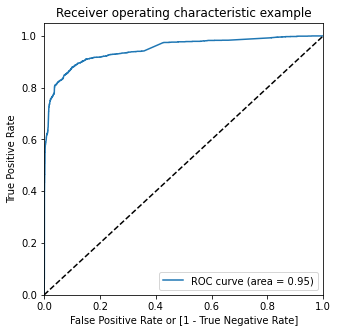

In [112]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The ROC Curve area value should be close to 1. Value of 0.95 indicates we have a good predictive model

#### Finding the best cut-off, other tha fixed 0.5

In [113]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.047535,0,1,0,0,0,0,0,0,0,0,0
1,1,0.566843,1,1,1,1,1,1,1,0,0,0,0
2,1,0.684171,1,1,1,1,1,1,1,1,0,0,0
3,1,0.998680,1,1,1,1,1,1,1,1,1,1,1
4,0,0.524794,1,1,1,1,1,1,1,0,0,0,0


In [114]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.380992,1.000000,0.000000
0.1,0.1,0.758182,0.941866,0.645127
0.2,0.2,0.877851,0.898915,0.864887
0.3,0.3,0.892231,0.867245,0.907610
0.4,0.4,0.896033,0.834273,0.934045
0.5,0.5,0.901322,0.814317,0.954873
0.6,0.6,0.893058,0.776573,0.964753
0.7,0.7,0.893058,0.757050,0.976769
0.8,0.8,0.888264,0.736659,0.981575
0.9,0.9,0.849917,0.625163,0.988251


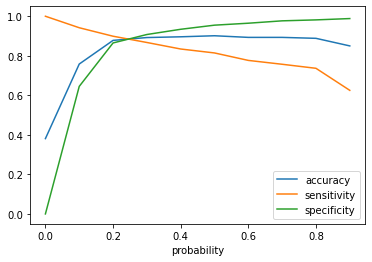

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.047535,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.566843,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.684171,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.998680,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.524794,1,1,1,1,1,1,1,0,0,0,0,1


In [117]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8879338842975206

In [118]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3334,  411],
       [ 267, 2038]], dtype=int64)

In [119]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [120]:
# Calculating the sensitivity
sens = TP/(TP+FN)
print(f"Sensitivity: {sens}")
# Calculating the specificity
spe = TN/(TN+FP)
print(f"Specificity: {spe}")

Sensitivity: 0.8841648590021692
Specificity: 0.8902536715620828


#### Now we have ROC curve value 0.95, and the following Train Data values:
- Accuracy: 88.8%
- Sensitivity: 88.4%
- Specificty: 89%

In [121]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
fp = FP/ float(TN+FP)
print(f"False Positive Rate: {fp}")
pp = TP / float(TP+FP)
print(f"Positive Predictive Value: {pp}")
nep = TN / float(TN+ FN)
print(f"Negative Predicive Value: {nep}")

False Positive Rate: 0.10974632843791722
Positive Predictive Value: 0.8321763985300122
Negative Predicive Value: 0.9258539294640378


In [122]:
#Looking at the confusion matrix again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3334,  411],
       [ 267, 2038]], dtype=int64)

In [123]:
##### Precision
TP / TP + FP

confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8321763985300122

In [124]:
##### Recall
TP / TP + FN

confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8841648590021692

In [125]:
print(f"Precision Score {precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)}")
print(f"Recall Socre {recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)}")

Precision Score 0.8321763985300122
Recall Socre 0.8841648590021692


#### With cut-off of 0.25, we have Precision ~ 83% and Recall ~ 88.4%

In [126]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

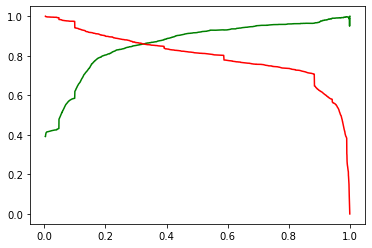

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 8. Test Set

In [128]:
# Apply scaler() to all the numeric variables

X_test[new_num_col] = scaler.transform(X_test[new_num_col])

In [129]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Total Time Spent on Website,Lead Source_Welingak Website,What matters most to you in choosing a course_Other,Tags_Closed by Horizzon,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
392,1.0,0.572037,0,0,1,0,0,0,0
332,1.0,0.000000,0,0,0,0,0,0,0
7653,1.0,0.402929,0,0,1,0,0,0,0
6327,1.0,0.000000,0,0,0,0,0,0,0
1265,1.0,0.536085,0,0,0,0,1,0,1


In [130]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.998371
1,0,0.099275
2,1,0.997262
3,0,0.099275
4,1,0.998044


In [131]:
# Rearranging the columns
y_pred_final = y_pred_final[['Converted','Conversion_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Conversion_Prob,Lead_Score
0,1,0.998371,100
1,0,0.099275,10
2,1,0.997262,100
3,0,0.099275,10
4,1,0.998044,100


In [132]:
#Predicting based on cut-off
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Lead_Score,final_predicted
0,1,0.998371,100,1
1,0,0.099275,10,0
2,1,0.997262,100,1
3,0,0.099275,10,0
4,1,0.998044,100,1


In [133]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8970304666409564

In [134]:
# Creating confusion matrix 
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion4

array([[1457,  170],
       [  97,  869]], dtype=int64)

In [135]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [136]:
# Precision = TP / TP + FP
pre = TP / (TP + FP)
print(f"Presision: {pre}")
#Recall = TP / TP + FN
recall = TP / (TP + FN)
print(f"Recall: {recall}")

Presision: 0.8321763985300122
Recall: 0.8841648590021692


In [137]:
# Calculating the sensitivity
sens = TP/(TP+FN)
print(f"Sensitivity: {sens}")
# Calculating the specificity
spe = TN/(TN+FP)
print(f"Specificity: {spe}")
print(f"Precision Score: {precision_score(y_pred_final.Converted , y_pred_final.final_predicted)}")
print(f"Recall Socre: {recall_score(y_pred_final.Converted, y_pred_final.final_predicted)}")

Sensitivity: 0.8841648590021692
Specificity: 0.8902536715620828
Precision Score: 0.836381135707411
Recall Socre: 0.8995859213250518


#### Test Data values:
- Accuracy: 89.7%
- Sensitivity: 88.4%
- Specificty: 89%

# 9. Conclusion

- Train Data:
    - Accuracy: 88.8%
    - Sensitivity: 88.4%
    - Specificty: 89% 
- Test Data:
    - Accuracy: 89.7%
    - Sensitivity: 88.4%
    - Specificty: 89%

Model has good accuracy, the following things can be concluded: 
- X Education Company needs to focus on following key aspects to improve the overall conversion rate:
    - Increase the total time spent on website, this can create more confidence in the content provided, thus higher conversion
    - Focus more on leads coming from Welingak Website
    - Increase activity on customers having tags "Closed by Horizzon", "Ringing", "Will revert after reading the email", "switched off"
    - Increase follow up with customers having Last notable activity as SMS Sent

In [138]:
#just for your reference, will not come in final draft
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'What matters most to you in choosing a course_Other',
       'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')